In [1]:
import numpy as np
import pandas as pd

np.random.seed(1234)

n_samples = 100

x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
x3 = np.random.randn(n_samples)

# 임의의 계수
a, b, c, d = 2.0, -1.5, 3.0, 5.0

# 종속 변수 생성 + noise
noise = np.random.randn(n_samples) * 0.5
y0 = a * x1 + b * x2 + c * x3 + d + noise

df = pd.DataFrame({'X1': x1, 'X2': x2, 'X3': x3, 'Y': y0})
df.head()

,X1,X2,X3,Y
0,0.471435,0.291205,-0.319561,4.810901
1,-1.190976,0.566534,-0.619993,0.263825
2,1.432707,0.503592,0.156998,7.472249
3,-0.312652,0.285296,-0.571455,3.551282
4,-0.720589,0.484288,1.057633,5.134221


In [4]:
from sklearn.model_selection import train_test_split

X = df[['X1', 'X2', 'X3']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [5]:
import statsmodels.api as sm

# 절편 포함
X_const = sm.add_constant(X_train)
X_const.head()

,const,X1,X2,X3
9,1.0,-2.242685,-1.281108,0.787965
51,1.0,-1.445810,0.796595,-1.712274
29,1.0,1.058969,0.678630,0.247112
88,1.0,0.270836,-0.414505,-0.354509
75,1.0,2.007843,-0.223019,0.983513


In [6]:
# 모델 학습
model = sm.OLS(y_train, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.26e-62
Time:                        14:27:19   Log-Likelihood:                -56.317
No. Observations:                  80   AIC:                             120.6
Df Residuals:                      76   BIC:                             130.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0523      0.058     86.414      0.000       4.936       5.169
X1             1.9673      0.062     31.827      0.000       1.844       2.090
X2            -1.5795      0.059    -26.839      0.000      -1.697      -1.462
X3             2.9591      0.062     47.842      0.000       2.836       3.082
==============================================================================
Omnibus:                        1.493   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.478
Skew:                           0.314   Prob(JB):                        0.478
Kurtosis:                       2.780   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model.params

const    5.052337
X1       1.967296
X2      -1.579514
X3       2.959071
dtype: float64


In [8]:
model.pvalues # LinearRegression은 미제공

const    1.218428e-77
X1       1.095671e-45
X2       1.624641e-40
X3       1.712198e-58
dtype: float64


In [12]:
model.rsquared

0.9776677023867212

In [17]:
model.conf_int(alpha=0.05)

,0,1
const,4.935890,5.168784
X1,1.844187,2.090405
X2,-1.696727,-1.462301
X3,2.835883,3.082259


In [18]:
print(dir(model))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_c

In [9]:
# 예측
X_const_test = sm.add_constant(X_test) # 평가 세트 절편 포함
y_pred = model.predict(X_const_test)
y_pred

40     3.126650
35     7.069840
81    -0.937694
61     6.696794
98    -2.102626
68     2.527345
85     5.654142
27     1.692251
39     9.822350
42     6.567602
33     1.928043
59     5.232185
63     8.653403
94     5.008815
56     6.620892
87    13.215581
96     4.479048
1     -0.020116
71     4.877364
82    -0.017297
dtype: float64

In [11]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(0.14070664793426885,
 0.29280345286321896,
 0.989423116757431,
 0.9776677023867212)

In [8]:
print("AIC :", model.aic)
print("BIC :", model.bic)

AIC : 120.63454906181968
BIC : 130.16265560051522


In [9]:
n = model.nobs        # 관측치 수
k = model.df_model + 1  # 변수 수 (상수항 포함)
aic = model.aic
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
aicc

121.16788239515301

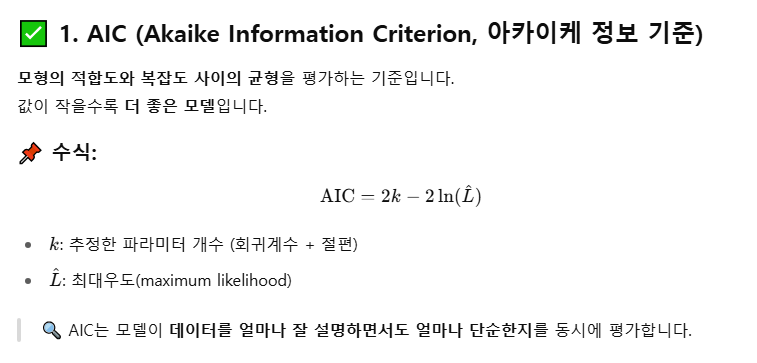
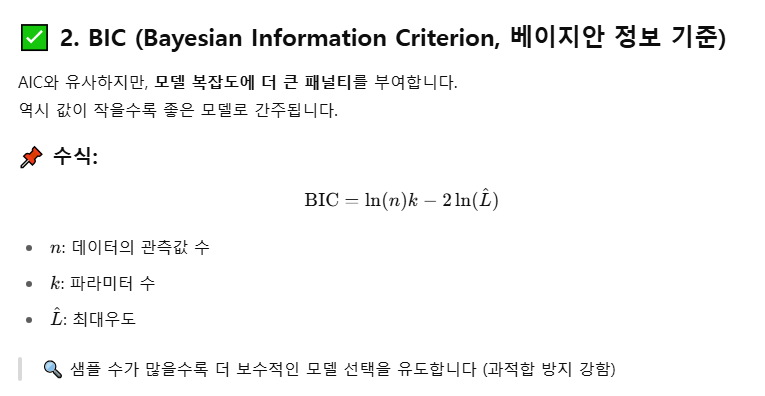
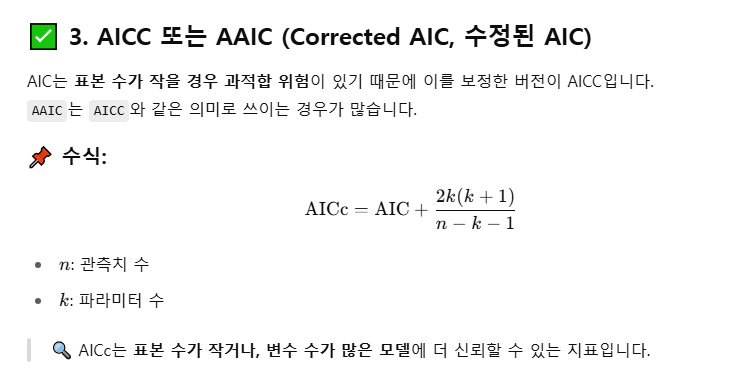
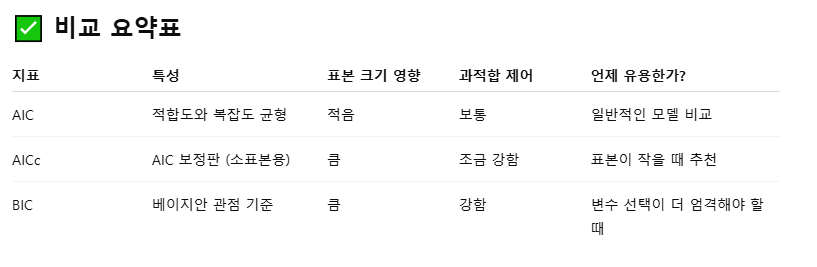
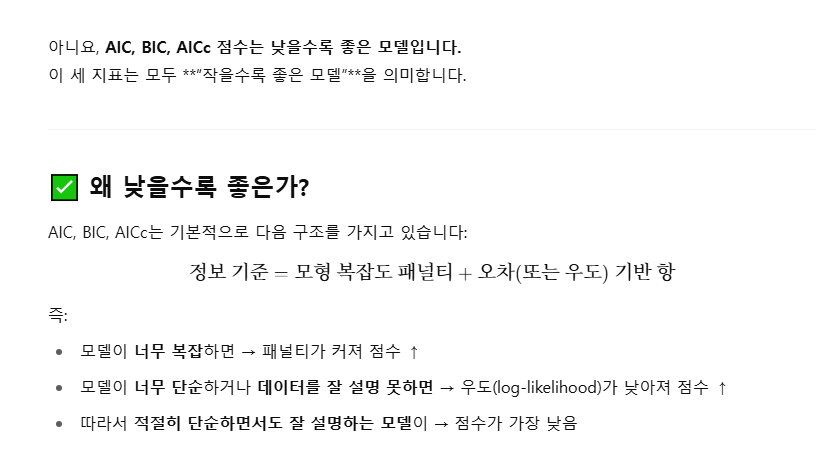